In [9]:
import tensorflow as tf

In [10]:
import matplotlib.pyplot as plt

In [11]:
from tensorflow.keras import models,layers

from tensorflow.keras.layers import Conv2D, Dense, Flatten


In [12]:
import numpy

In [13]:
IMAGE_SIZE = 256
BATCH_SIZE =32
EPOCHS =30
CHANNELS =3

In [14]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
 "PlantVillage",
  shuffle = True,
  image_size =(IMAGE_SIZE,IMAGE_SIZE),
  batch_size= BATCH_SIZE,
)
    

Found 2152 files belonging to 3 classes.


In [15]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
len(dataset)

68

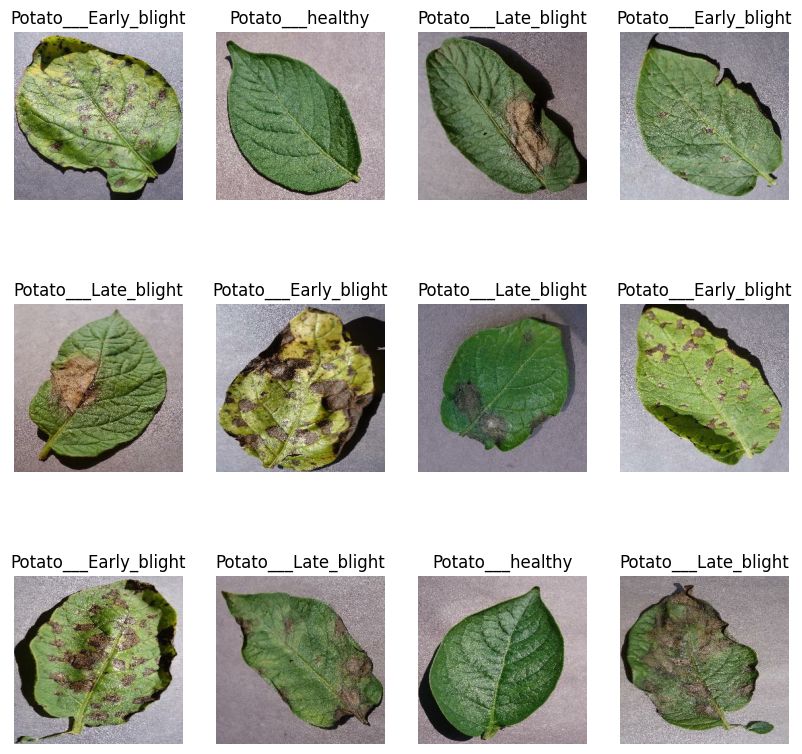

In [17]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
    

In [19]:
len(dataset)

68

In [20]:
#80% ==> training
#10% ==> validation, 10% ==> test

In [21]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [22]:
train_ds = dataset.take(54)
len(train_ds)

54

In [23]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [24]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [25]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [26]:
test_ds= test_ds.skip(6)

In [27]:
len(test_ds)

8

In [28]:
TRAIN_SPLIT = 0.8
VAL_SPLIT =0.1
TEST_SPLIT =0.1

In [29]:
def get_dataset_partitions_tf(ds,train_split=TRAIN_SPLIT, val_split=VAL_SPLIT, test_split=TEST_SPLIT , shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed =123)
    train_size = int(train_split* ds_size)
    val_size = int(val_split* ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [30]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [31]:
len(train_ds)

54

In [32]:
len(val_ds)

6

In [33]:
len(test_ds)

8

In [34]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
# It will first read the image from the disk and for the next iteration when you need this image it will stored it in memory,
# this improves the performance of your pipeline.
"'if u are using GPU AND CPU, if GPU is busy in training prefetch will load the next set of batch from your list and that will improve the performance."""
    

"'if u are using GPU AND CPU, if GPU is busy in training prefetch will load the next set of batch from your list and that will improve the performance."

In [35]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), # during prediction if the image is not 255,255 thats why we resize.
    layers.experimental.preprocessing.Rescaling(1./255)   #this experimental is table.it will scale the layer to 255

])

In [36]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [37]:
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
   resize_and_rescale,
   
   layers.Conv2D(32, (3,3), activation ='relu', input_shape = input_shape),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(64, kernel_size= (3,3), activation ='relu'), 
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(64, kernel_size= (3,3), activation ='relu'),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(64, kernel_size= (3,3), activation ='relu'),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(64, kernel_size= (3,3), activation ='relu'),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(64, kernel_size= (3,3), activation ='relu'),
   layers.MaxPooling2D((2,2)),
   
   layers.Flatten(),
    
   layers.Dense(64, activation = 'relu'),
   layers.Dense(n_classes, activation = 'softmax') 
    
])

model.build(input_shape = input_shape)

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [39]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [40]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
54/54 [==============================] - 924s 14s/step - loss: 0.9114 - accuracy: 0.4707 - val_loss: 0.8067 - val_accuracy: 0.7552
Epoch 2/30
54/54 [==============================] - 680s 12s/step - loss: 0.6697 - accuracy: 0.7353 - val_loss: 0.4193 - val_accuracy: 0.8177
Epoch 3/30
54/54 [==============================] - 481s 9s/step - loss: 0.5393 - accuracy: 0.7758 - val_loss: 0.3012 - val_accuracy: 0.8958
Epoch 4/30
54/54 [==============================] - 704s 13s/step - loss: 0.3570 - accuracy: 0.8410 - val_loss: 0.3561 - val_accuracy: 0.8229
Epoch 5/30
54/54 [==============================] - 725s 14s/step - loss: 0.2798 - accuracy: 0.8862 - val_loss: 0.2003 - val_accuracy: 0.9062
Epoch 6/30
54/54 [==============================] - 609s 11s/step - loss: 0.2376 - accuracy: 0.8967 - val_loss: 0.1961 - val_accuracy: 0.9271
Epoch 7/30
54/54 [==============================] - 690s 13s/step - loss: 0.2301 - accuracy: 0.9096 - val_loss: 0.2130 - val_accuracy: 0.9062
Epoch 8

In [41]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 316s 2s/step - loss: 0.0490 - accuracy: 0.9883


In [42]:
scores  #its a python list in which ist parameter is loss and 2nd is accuracy.

[0.04903459921479225, 0.98828125]

In [43]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 54}

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 

NameError: name 'dict_keys' is not defined

loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch 

In [48]:
len(history.history['loss'])

30

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

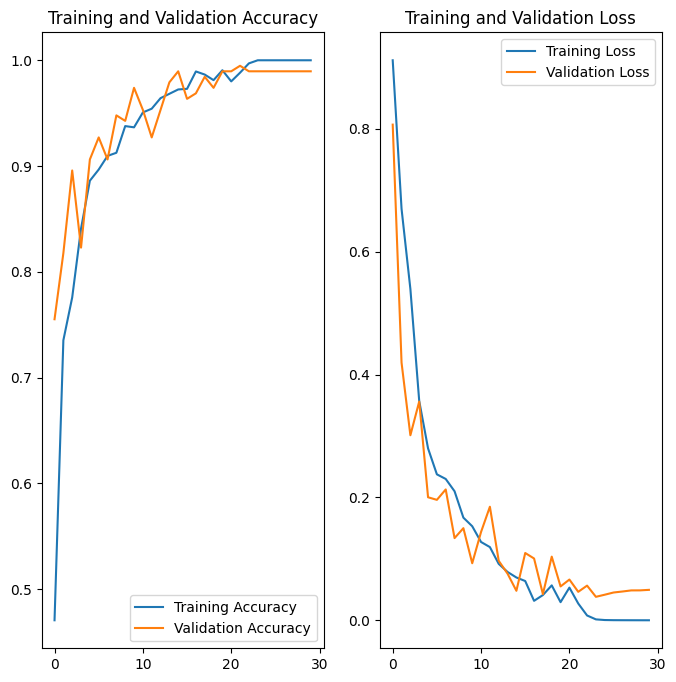

In [50]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight
[4.9916203e-03 9.9500835e-01 1.0466557e-18]


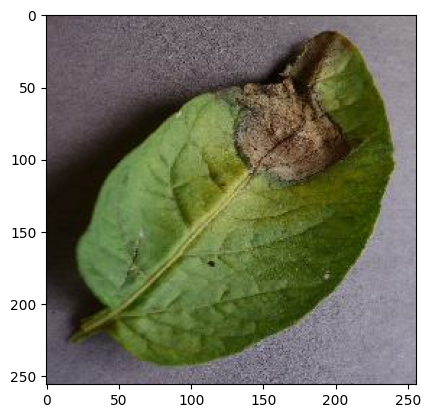

In [67]:
# Run prediction on a sample image
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch) #using predict image and it expect argument of image_batch
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]) # which class has highest probability, it is the class.
    print(batch_prediction[0]) # its giving 3 values b/c with dense layer we give n_classes =3 and softmax gives you probability.

In [68]:
#Write a function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #convert image into array
    img_array = tf.expand_dims(img_array, 0) # create a batch out of it

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)  # its actually probability
    return predicted_class, confidence

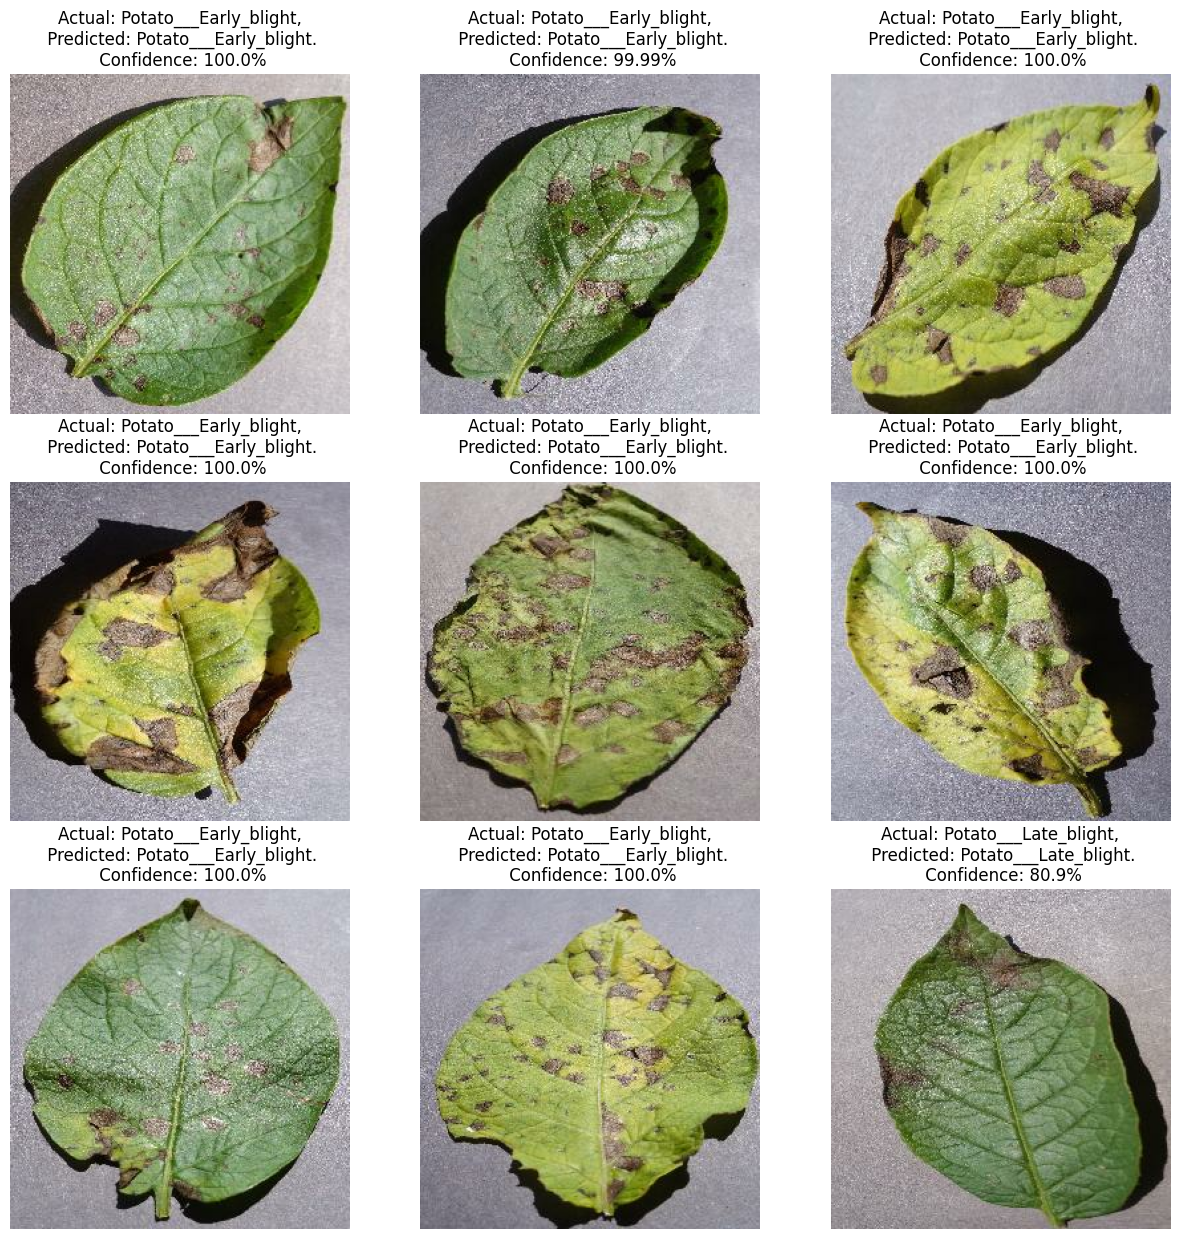

In [69]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy()) #calling model using predict function and giving it images. 
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [81]:
model_version =1       # saving 2 versions of model
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


In [85]:
#Saving the Model
#We append the model to the list of models as a new version.saving new version of model if we changed something.

import os
model_version=max([int(i) for i in os.listdir("../models")+ [0]])+1
model.save(f"../models/{model_version}")



INFO:tensorflow:Assets written to: ../models/2\assets


In [86]:
no_of_models_version_saved = [int (i) for i in os.listdir("../models")]  # to check how many models we have saved 
no_of_models_version_saved

[1, 2]

In [57]:
model.save("../potatoes.h5")

I have imported my model to my disk, now we will built API and use this model.